[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0226
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.6182e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.9011e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.8614e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.9331e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.4408e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.8592e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6230e-04
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error (MSE): 9.298582169159006
Root Mean Squared Error (RMSE): 3.049357665010618
Mean Absolute Error (MAE): 1.8130851799782455
R² Score: 0.9936869417982224


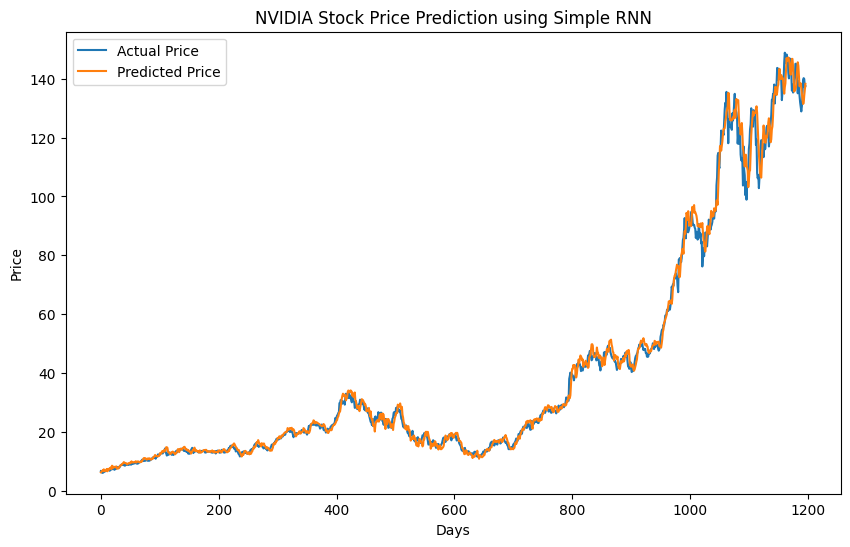

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 1: Load NVIDIA (NVDA) stock data
data = yf.download('NVDA', start='2020-01-01', end='2024-12-31')
close_prices = data['Close'].values.reshape(-1, 1)

# Step 2: Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

# Step 3: Create sequences (60 days history → 1 day prediction)
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Reshape input to Simple RNN expected format [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Build Simple RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Step 6: Predict and plot
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y)

# Step 7: Calculate evaluation metrics
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Step 8: Plot results
plt.figure(figsize=(10,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("NVIDIA Stock Price Prediction using Simple RNN")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0522
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0013
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.5267e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9991e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.4084e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.6724e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.9251e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.7298e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.1830e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 5.0888e-04
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Mean Squared Error (MSE): 10.262994049500367
Root Mean Squared Error (RMSE): 3.203590805564963
Mean Absolute Error (MAE): 1.93316738507901
R² Score: 0.9930321765640908


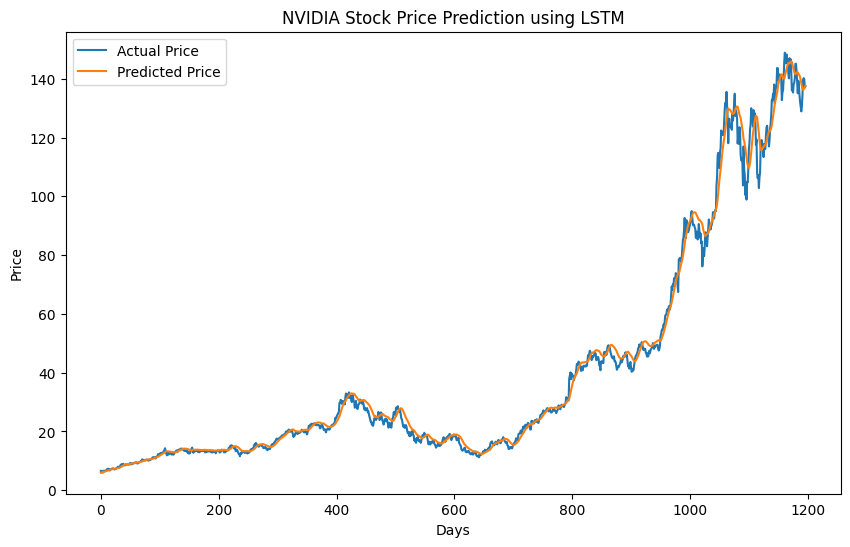

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load NVIDIA (NVDA) stock data
data = yf.download('NVDA', start='2020-01-01', end='2024-12-31')
close_prices = data['Close'].values.reshape(-1, 1)

# Step 2: Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

# Step 3: Create sequences (60 days history → 1 day prediction)
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Reshape input to LSTM expected format [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Step 6: Predict and plot
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y)

# Step 7: Calculate evaluation metrics
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Step 8: Plot results
plt.figure(figsize=(10,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("NVIDIA Stock Price Prediction using LSTM")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
# Recurrent Neural Network (RNN)

## 1. Introduction
- RNN stands for Recurrent Neural Network.
- It is a type of neural network used for sequential data.
- It has memory to remember previous inputs.
- It is used in NLP, time series prediction, speech recognition, etc.

---

## 2. Concept
- Traditional neural networks cannot handle sequences.
- RNNs handle sequences by using loops in the architecture.
- The output of a time step depends on the current input and previous hidden state.

---

## 3. Architecture

Each time step has:
- Input vector: `xₜ`
- Hidden state: `hₜ`
- Output: `yₜ`

Equations:
- Hidden state update:
  `hₜ = f(Wxₜ + Uhₜ₋₁ + b)`
- Output computation:
  `yₜ = g(Vhₜ + c)`

Where:
- `W`: input-to-hidden weight
- `U`: hidden-to-hidden weight
- `V`: hidden-to-output weight
- `b`, `c`: biases
- `f`: activation function like tanh or ReLU
- `g`: activation like softmax or sigmoid

---

## 4. Working

1. The input `xₜ` is given at each time step `t`.
2. The hidden state `hₜ` is calculated using current input and previous hidden state.
3. The output `yₜ` is generated using the current hidden state.
4. This process repeats for each time step in the sequence.

---

## 5. Training the RNN (Backpropagation Through Time - BPTT)

### Loss function:
- Total loss over time steps:
  `L = ∑ₜ Loss(yₜ, yₜ^true)`

### Output gradient:
- `∂Lₜ/∂V = ∂Lₜ/∂yₜ ⋅ ∂yₜ/∂V`

### Hidden state gradient (recursive):
- `∂Lₜ/∂hₜ = ∂Lₜ/∂yₜ ⋅ V + ∂Lₜ₊₁/∂hₜ₊₁ ⋅ ∂hₜ₊₁/∂hₜ`

### Gradients for weights:
- Input weight:
  `∂L/∂W = ∑ₜ ∂Lₜ/∂hₜ ⋅ ∂hₜ/∂W`
- Hidden weight:
  `∂L/∂U = ∑ₜ ∂Lₜ/∂hₜ ⋅ ∂hₜ/∂hₜ₋₁ ⋅ ∂hₜ₋₁/∂U`

### Summary:
- Errors are backpropagated through time steps.
- Each hidden state gets gradients from current and future time steps.
- This process is called Backpropagation Through Time (BPTT).

---

## 6. Problems with RNN

1. **Vanishing gradient**:
   - Gradients become very small.
   - Network cannot learn long-term dependencies.
2. **Exploding gradient**:
   - Gradients become very large.
   - Training becomes unstable.
3. **Slow training** due to sequential nature.

---

## 7. Solutions

- Use **LSTM** or **GRU** which solve vanishing gradient problem.
- Use **gradient clipping** to control exploding gradients.

---

## 8. Applications

- Text generation
- Sentiment analysis
- Speech recognition
- Machine translation
- Stock price prediction

---

## 9. Key Points to Remember

- RNN handles sequences by using hidden states.
- Hidden state stores memory of previous inputs.
- BPTT is used to train RNN by flowing error backward through time.
- RNN struggles with long-term dependencies.
- LSTM and GRU are improved versions of RNN.

---

## 10. Keywords

- RNN
- Hidden state
- Sequence modeling
- BPTT
- Vanishing gradient
- Exploding gradient
- LSTM
- GRU
Let me know if you want this converted into a PDF or diagram form for quick revision!







You said:
i want in detailed with depth


ChatGPT said:
Absolutely! Here's a deep and detailed markdown explanation of RNN (Recurrent Neural Network), covering concept, architecture, working, formulas, BPTT, problems, improvements, and applications – all in simple and structured language for viva preparation.

markdown
Copy
Edit
# Recurrent Neural Network (RNN) – Full Theory with Depth

## 1. Objective
RNN is designed to:
- Learn from sequential or time-series data.
- Maintain a form of memory to link previous inputs with the current output.
- Model problems where current output depends not just on the current input, but also on previous inputs.

---

## 2. What is an RNN?
- RNN stands for Recurrent Neural Network.
- It is a type of neural network that has loops.
- These loops allow information to be passed from one time step to the next.
- It processes data in sequences, unlike traditional feedforward networks.

### Why use RNN?
- In tasks like language, time series, or speech, order matters.
- Example: The meaning of a sentence depends on the order of words.

---

## 3. Structure of RNN

### Core Components:
1. **Input (xₜ):** The input vector at time step `t`.
2. **Hidden state (hₜ):** Memory of the network at time `t`.
3. **Output (yₜ):** The predicted output at time `t`.

### Weights Used:
- **W:** Weight matrix for input to hidden state.
- **U:** Weight matrix from previous hidden state to current hidden state.
- **V:** Weight matrix from hidden state to output.
- **b:** Bias for hidden state.
- **c:** Bias for output.

### Activation Functions:
- Usually, `tanh` or `ReLU` for hidden layers.
- `softmax` or `sigmoid` for output, depending on task.

---

## 4. Forward Pass Equations (Per Time Step)

1. **Hidden State Update:**
hₜ = f(Wxₜ + Uhₜ₋₁ + b)

markdown
Copy
Edit
- `f` is usually `tanh` or `ReLU`
- This equation combines current input and previous memory to form new memory.

2. **Output Calculation:**
yₜ = g(Vhₜ + c)

markdown
Copy
Edit
- `g` is `softmax` or `sigmoid`
- This generates the final output from hidden state.

---

## 5. Complete Working of RNN

### Step-by-step Process:
1. First input `x₁` is passed.
2. Initial hidden state `h₀` is usually zeros.
3. Hidden state `h₁` is calculated using `x₁` and `h₀`.
4. Output `y₁` is produced.
5. Then, next input `x₂` is passed along with `h₁`, and so on...
6. This continues for the full sequence.

### Memory Handling:
- Hidden state `hₜ` carries information across time steps.
- This is why RNN is good at handling sequences.

---

## 6. Loss Function

- Loss is calculated at each time step:
L = ∑ₜ Loss(yₜ, yₜ^true)

yaml
Copy
Edit
- For classification, cross-entropy loss is used.

---

## 7. Training RNN – Backpropagation Through Time (BPTT)

### Why BPTT?
- Because RNN has time steps, errors must be backpropagated through each time step.
- It is like applying backpropagation repeatedly through each time link of the network.

### Key Formulas:

1. **Gradient for Output Weight (V):**
∂Lₜ/∂V = ∂Lₜ/∂yₜ × ∂yₜ/∂V

markdown
Copy
Edit

2. **Gradient for Hidden State (Recursive):**
∂Lₜ/∂hₜ = ∂Lₜ/∂yₜ × V + ∂Lₜ₊₁/∂hₜ₊₁ × ∂hₜ₊₁/∂hₜ

markdown
Copy
Edit

3. **Gradients for W and U:**
- Input weight:
  ```
  ∂L/∂W = ∑ₜ ∂Lₜ/∂hₜ × ∂hₜ/∂W
  ```
- Hidden-to-hidden weight:
  ```
  ∂L/∂U = ∑ₜ ∂Lₜ/∂hₜ × ∂hₜ/∂hₜ₋₁ × ∂hₜ₋₁/∂U
  ```

### What Happens in BPTT:
- Gradients are accumulated through each time step.
- Past states influence current loss through recurrence.
- Training is computationally expensive.

---

## 8. Problems in RNN

### 1. **Vanishing Gradient Problem:**
- Gradients become very small over time.
- The network forgets earlier information.
- Long-term dependencies cannot be learned.

### 2. **Exploding Gradient Problem:**
- Gradients become very large.
- Causes unstable training and weight updates.

### 3. **Slow Training:**
- RNNs are sequential; hard to parallelize.
- Training becomes time-consuming.

---

## 9. Solutions and Improvements

### 1. **Use of LSTM (Long Short-Term Memory):**
- Special RNN that uses gates (input, forget, output).
- Solves vanishing gradient problem.
- Can learn long-term dependencies.

### 2. **Use of GRU (Gated Recurrent Unit):**
- Simpler than LSTM.
- Also solves vanishing gradients.

### 3. **Gradient Clipping:**
- Prevents exploding gradients by capping their size.

### 4. **Batch Processing + Optimization Tricks:**
- Use of parallelization techniques like mini-batches.

---

## 10. Applications of RNN

- **Natural Language Processing:**
- Sentiment analysis
- Text generation
- Machine translation
- **Time Series Forecasting:**
- Stock prices
- Weather prediction
- **Speech Recognition**
- **Music Generation**
- **Video Frame Prediction**

---

## 11. Summary for Viva

| Point | Description |
|-------|-------------|
| Definition | Neural network for sequence modeling |
| Key Concept | Recurrence using hidden state |
| Hidden State Formula | `hₜ = f(Wxₜ + Uhₜ₋₁ + b)` |
| Output Formula | `yₜ = g(Vhₜ + c)` |
| Loss | `L = ∑ Loss(yₜ, yₜ^true)` |
| Training | Backpropagation Through Time (BPTT) |
| Issues | Vanishing & Exploding gradients |
| Solutions | LSTM, GRU, Gradient Clipping |
| Applications | NLP, time series, speech, etc. |

---

## 12. Keywords to Remember

- Sequential data
- Hidden state
- Recurrence
- BPTT
- Vanishing gradient
- LSTM / GRU
- Time dependency
- Activation functions
- Softmax / Tanh

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Epoch 1/20, Loss: 0.3380
Epoch 2/20, Loss: 0.2938
Epoch 3/20, Loss: 0.2531
Epoch 4/20, Loss: 0.2156
Epoch 5/20, Loss: 0.1811
Epoch 6/20, Loss: 0.1497
Epoch 7/20, Loss: 0.1214
Epoch 8/20, Loss: 0.0966
Epoch 9/20, Loss: 0.0757
Epoch 10/20, Loss: 0.0594
Epoch 11/20, Loss: 0.0484
Epoch 12/20, Loss: 0.0438
Epoch 13/20, Loss: 0.0455
Epoch 14/20, Loss: 0.0518
Epoch 15/20, Loss: 0.0585
Epoch 16/20, Loss: 0.0619
Epoch 17/20, Loss: 0.0609
Epoch 18/20, Loss: 0.0566
Epoch 19/20, Loss: 0.0509
Epoch 20/20, Loss: 0.0453


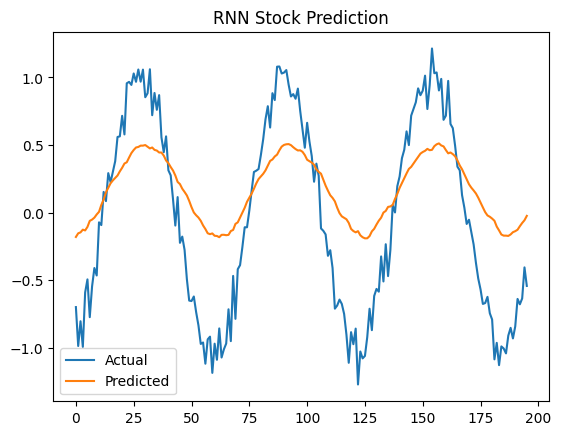

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Dummy data (replace with actual stock data)
import yfinance as yf
df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
data = df['Close'].values.reshape(-1, 1)

# # Let's create some sine wave data as stock prices
# def generate_data(seq_length=50):
#     x = np.linspace(0, 100, 1000)
#     data = np.sin(x) + 0.1 * np.random.randn(1000)
#     return data.reshape(-1, 1)

# Prepare sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# RNN Model
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        last_output = out[:, -1, :]
        return self.fc(last_output)

# Hyperparameters
seq_length = 20
hidden_size = 50
num_epochs = 20
lr = 0.001

# Load and preprocess data
data = generate_data()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

x, y = create_sequences(data_scaled, seq_length)
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split into train/test
train_size = int(len(x_tensor) * 0.8)
x_train, x_test = x_tensor[:train_size], x_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# Model, loss, optimizer
model = SimpleRNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    model.train()
    output = model(x_train)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Testing
model.eval()
predicted = model(x_test).detach().numpy()
actual = y_test.numpy()
predicted_unscaled = scaler.inverse_transform(predicted)
actual_unscaled = scaler.inverse_transform(actual)

# Plotting
plt.plot(actual_unscaled, label='Actual')
plt.plot(predicted_unscaled, label='Predicted')
plt.legend()
plt.title("RNN Stock Prediction")
plt.show()


In [ ]:
# Install required libraries (if not already installed)
!pip install kagglehub
!pip install yfinance pandas matplotlib scikit-learn torch

# Download Apple stock dataset from KaggleHub
import kagglehub

path = kagglehub.dataset_download("mayankanand2701/apple-stock-price-dataset")
print("Dataset Path:", path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 218k/218k [00:00<00:00, 55.0MB/s]

Extracting files...
Dataset Path: /root/.cache/kagglehub/datasets/mayankanand2701/apple-stock-price-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load CSV file (adjust file name if needed)
file_path = f"{path}/AAPL.csv"
df = pd.read_csv(file_path)

# Use 'Close' prices
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/mayankanand2701/apple-stock-price-dataset/versions/1/AAPL.csv'

In [ ]:
# Convert data to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 20
x, y = create_sequences(data_scaled, seq_length)

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Train/Test split
train_size = int(len(x_tensor) * 0.8)
x_train, x_test = x_tensor[:train_size], x_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]


In [ ]:
# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])

model = SimpleRNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    output = model(x_train)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Epoch 1/20, Loss: 0.0018
Epoch 2/20, Loss: 0.0014
Epoch 3/20, Loss: 0.0016
Epoch 4/20, Loss: 0.0013
Epoch 5/20, Loss: 0.0011
Epoch 6/20, Loss: 0.0013
Epoch 7/20, Loss: 0.0013
Epoch 8/20, Loss: 0.0012
Epoch 9/20, Loss: 0.0011
Epoch 10/20, Loss: 0.0011
Epoch 11/20, Loss: 0.0011
Epoch 12/20, Loss: 0.0011
Epoch 13/20, Loss: 0.0010
Epoch 14/20, Loss: 0.0010
Epoch 15/20, Loss: 0.0010
Epoch 16/20, Loss: 0.0010
Epoch 17/20, Loss: 0.0010
Epoch 18/20, Loss: 0.0009
Epoch 19/20, Loss: 0.0009
Epoch 20/20, Loss: 0.0008


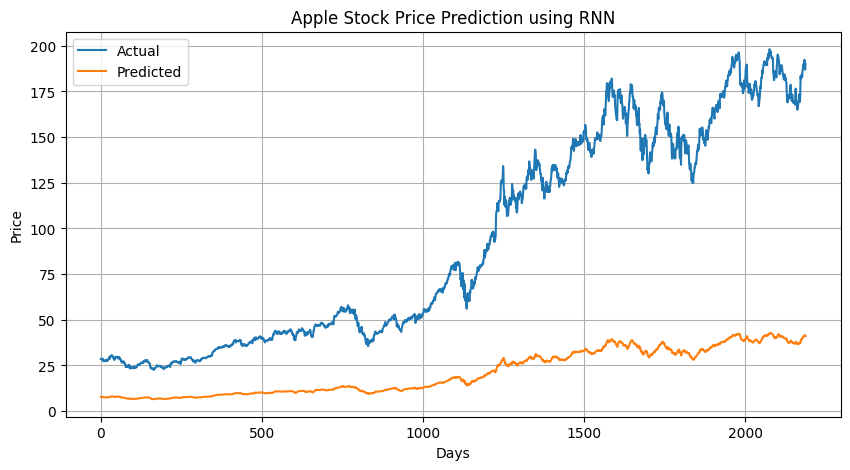

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/Apple Dataset.csv')

print(df.columns)

data = df['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 20
x, y = create_sequences(data_scaled, seq_length)

# Convert to tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Train/test split
train_size = int(len(x_tensor) * 0.8)
x_train, x_test = x_tensor[:train_size], x_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        last_output = out[:, -1, :]
        return self.fc(last_output)

model = SimpleRNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    output = model(x_train)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Test the model
model.eval()
predicted = model(x_test).detach().numpy()
actual = y_test.numpy()

# Inverse transform to original scale
predicted_unscaled = scaler.inverse_transform(predicted)
actual_unscaled = scaler.inverse_transform(actual)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(actual_unscaled, label='Actual')
plt.plot(predicted_unscaled, label='Predicted')
plt.legend()
plt.title("Apple Stock Price Prediction using RNN")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential,Bidirectional
from tensorflow.keras.layers import SimpleRNN, Dense, Bidirectional, Dropout
from tensorflow.keras.layers import SimpleRNN, Dense

ImportError: cannot import name 'Bidirectional' from 'tensorflow.keras.models' (/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/models/__init__.py)

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
# Import Bidirectional from tensorflow.keras.layers
from tensorflow.keras.layers import SimpleRNN, Dense, Bidirectional, Dropout

In [ ]:
data = yf.download("NVDA", start="2020-01-01", end="2023-12-08")
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972160,5.972160,5.892751,5.943284,237536000
2020-01-03,5.876570,5.920383,5.827530,5.852424,205384000
2020-01-06,5.901216,5.906444,5.757084,5.783222,262636000
2020-01-07,5.972658,6.018462,5.884536,5.929593,314856000
2020-01-08,5.983860,6.025184,5.928348,5.968427,277108000
...,...,...,...,...,...
2023-12-01,46.743336,47.178136,46.165604,46.503449,369317000
2023-12-04,45.488914,46.055653,44.989146,46.055653,437543000


In [ ]:
data = data[["Close"]]
data

Price,Close
Ticker,NVDA
Date,
2020-01-02,5.972160
2020-01-03,5.876570
2020-01-06,5.901216
2020-01-07,5.972658
2020-01-08,5.983860
...,...
2023-12-01,46.743336
2023-12-04,45.488914


In [ ]:
# Normalize data
scaler = MinMaxScaler()
data["Close"] = scaler.fit_transform(np.array(data["Close"]).reshape(-1, 1))
data

Price,Close
Ticker,NVDA
Date,
2020-01-02,0.023744
2020-01-03,0.021642
2020-01-06,0.022184
2020-01-07,0.023755
2020-01-08,0.024001
...,...
2023-12-01,0.919938
2023-12-04,0.892364


In [ ]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [ ]:
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset['Close'][i:(i + look_back)].values  # Access 'Close' column and convert to NumPy array
        X.append(a)
        # Access 'Close' column by name using .iloc for integer-based indexing
        Y.append(dataset['Close'].iloc[i + look_back])
    return np.array(X), np.array(Y)


look_back = 60
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)



In [ ]:
X_train[1]

array([[0.02164243],
       [0.02218418],
       [0.02375455],
       [0.02400079],
       [0.02544537],
       [0.02615671],
       [0.03034812],
       [0.02777636],
       [0.02684068],
       [0.02867921],
       [0.02887077],
       [0.02813752],
       [0.02932489],
       [0.03082964],
       [0.02952735],
       [0.02390234],
       [0.02815393],
       [0.02682429],
       [0.02697199],
       [0.02183944],
       [0.02397347],
       [0.02769427],
       [0.02968058],
       [0.03159024],
       [0.03013475],
       [0.03636166],
       [0.03905381],
       [0.04159818],
       [0.04063516],
       [0.05103708],
       [0.05474699],
       [0.0646674 ],
       [0.06138433],
       [0.05337903],
       [0.04200311],
       [0.03585825],
       [0.03892249],
       [0.03077006],
       [0.04033503],
       [0.04381722],
       [0.03804646],
       [0.0482411 ],
       [0.042098  ],
       [0.03812856],
       [0.02684991],
       [0.03541294],
       [0.02741382],
       [0.010

In [ ]:
Y_train

array([[0.03788218],
       [0.03679266],
       [0.02555227],
       [0.03234139],
       [0.0260122 ],
       [0.0394207 ],
       [0.03429054],
       [0.03862683],
       [0.03643678],
       [0.04021458],
       [0.04793448],
       [0.04623171],
       [0.05382022],
       [0.05251715],
       [0.04963176],
       [0.04002848],
       [0.049139  ],
       [0.04796734],
       [0.05102241],
       [0.05512326],
       [0.05199151],
       [0.05587885],
       [0.05249527],
       [0.04729389],
       [0.05195317],
       [0.0532946 ],
       [0.05551201],
       [0.05938837],
       [0.06356589],
       [0.06910667],
       [0.06334686],
       [0.0628541 ],
       [0.0683402 ],
       [0.0784198 ],
       [0.08410296],
       [0.08531294],
       [0.08891558],
       [0.08465043],
       [0.09014748],
       [0.08339121],
       [0.07917539],
       [0.07833769],
       [0.08684603],
       [0.08532935],
       [0.08574552],
       [0.0845245 ],
       [0.08454645],
       [0.087

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1616
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0011
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.3832e-04
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.5528e-04
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.5323e-04
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4.3256e-04
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.1353e-04
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.0551e-04
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.6155e-04
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 4.1660e-04
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4.5107e-04
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4.1627e-04
Epoch 15/50
12/12 ━━━━━━━━━━━━━

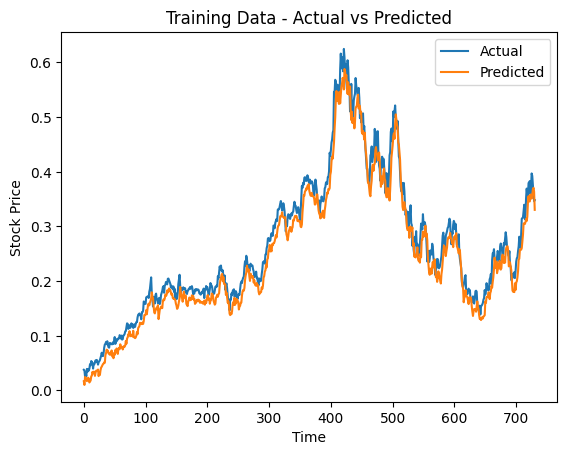

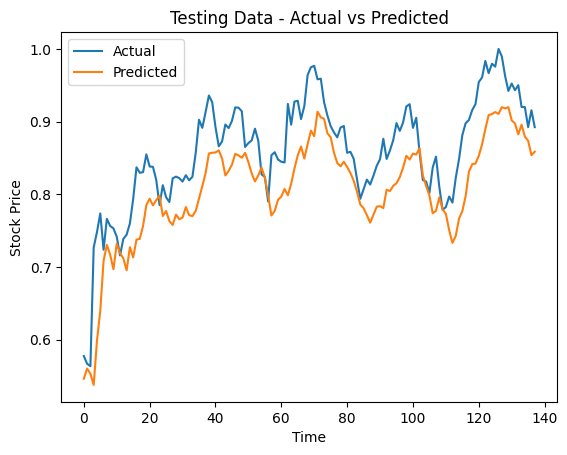

In [ ]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, Y_train, epochs=50, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train before inverse transform
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test before inverse transform

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Calculate root mean squared error (RMSE)
train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))
print('Train RMSE: %.3f' % (train_rmse))
print('Test RMSE: %.3f' % (test_rmse))

# Calculate mean absolute error (MAE)
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print('Train MAE: %.3f' % (train_mae))
print('Test MAE: %.3f' % (test_mae))

# Plot the results
import matplotlib.pyplot as plt

# Plot the training data and predictions
plt.plot(Y_train, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Training Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the testing data and predictions
plt.plot(Y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Testing Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1005
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0014
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.0115e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.1906e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 6.8918e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 7.4234e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 6.3427e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 6.2186e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.8323e-04
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.7369e-04
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.1874e-04
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.6190e-04
Epoch 15/100
12/12 ━━━━━━━━━━

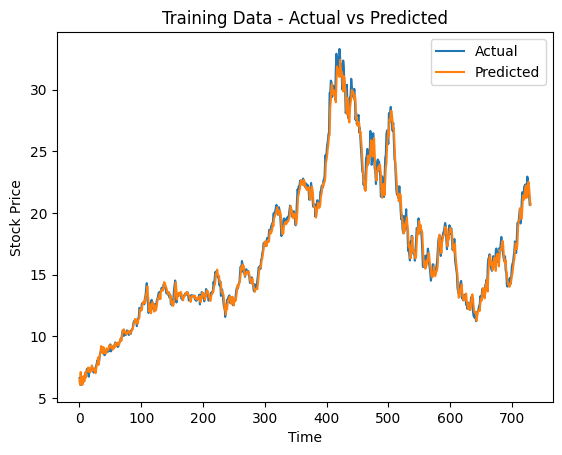

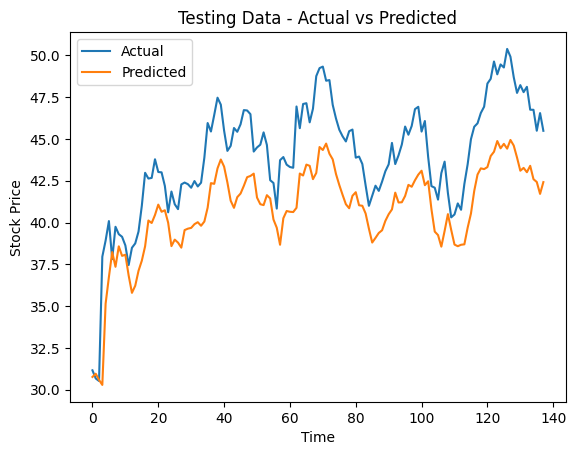

In [ ]:


# Download historical stock data (e.g., Apple)
data = yf.download("NVDA", start="2020-01-01", end="2023-12-08")
data = data[["Close"]]  # Use only closing price

# Normalize data
scaler = MinMaxScaler()
data["Close"] = scaler.fit_transform(np.array(data["Close"]).reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Create dataset with lookback period (e.g., 60 days)
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset['Close'][i:(i + look_back)].values  # Access 'Close' column and convert to NumPy array
        X.append(a)
        # Access 'Close' column by name using .iloc for integer-based indexing
        Y.append(dataset['Close'].iloc[i + look_back])
    return np.array(X), np.array(Y)

look_back = 60
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train before inverse transform
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test before inverse transform

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Calculate root mean squared error (RMSE)
train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))
print('Train RMSE: %.3f' % (train_rmse))
print('Test RMSE: %.3f' % (test_rmse))

# Calculate mean absolute error (MAE)
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print('Train MAE: %.3f' % (train_mae))
print('Test MAE: %.3f' % (test_mae))

# Plot the results
import matplotlib.pyplot as plt

# Plot the training data and predictions
plt.plot(Y_train, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Training Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the testing data and predictions
plt.plot(Y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Testing Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Download historical stock data (e.g., Apple)
data = yf.download("NVDA", start="2020-01-01", end="2023-12-08")
data = data[["Close"]]  # Use only closing price

# Normalize data
scaler = MinMaxScaler()
data["Close"] = scaler.fit_transform(np.array(data["Close"]).reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Create dataset with lookback period (e.g., 60 days)
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset['Close'][i:(i + look_back)].values  # Access 'Close' column and convert to NumPy array
        X.append(a)
        # Access 'Close' column by name using .iloc for integer-based indexing
        Y.append(dataset['Close'].iloc[i + look_back])
    return np.array(X), np.array(Y)

look_back = 20
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Bidirectional(SimpleRNN(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(SimpleRNN(50)))
model.add(Dense(1))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train before inverse transform
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test before inverse transform

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Calculate root mean squared error (RMSE)
train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))
print('Train RMSE: %.3f' % (train_rmse))
print('Test RMSE: %.3f' % (test_rmse))

# Calculate mean absolute error (MAE)
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print('Train MAE: %.3f' % (train_mae))
print('Test MAE: %.3f' % (test_mae))

# Plot the results
import matplotlib.pyplot as plt

# Plot the training data and predictions
plt.plot(Y_train, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Training Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the testing data and predictions
plt.plot(Y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Testing Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 